In [183]:
# 读取数据
import pandas as pd
data = pd.read_csv('../data/homework/train.csv')
df = data.copy()
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C


In [184]:
# 去除无用特征
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [185]:
df = pd.get_dummies(df)
df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [186]:
# 替换/删除空值，这里是删除
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

#df['Age']=df['Age'].fillna(df['Age'].mean()-3.5)
#经过反复验证，取平均值的方法预测结果对于survice得到0的预测更准确，但是对于survive为1 的情况的预测并不佳，所以还是去除缺失数据比较好
df.dropna(inplace=True)
print('Is there any NaN in the dataset: {}'.format(df.isnull().values.any()))

Is there any NaN in the dataset: True
Is there any NaN in the dataset: False


In [187]:
# 把categorical数据通过one-hot变成数值型数据
# 很简单，比如sex=[male, female]，变成两个特征,sex_male和sex_female，用0, 1表示
df = pd.get_dummies(df)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.1 KB


In [188]:
# train-test split
import numpy as np
from sklearn.model_selection import train_test_split
X=df.loc[:,df.columns!='Survived']
y=df.loc[:,df.columns=='Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
#这里测试集采样为6：4的结果能够让两个都拟合比较好
print('X_train: {}'.format(np.shape(X_train)))
print('y_train: {}'.format(np.shape(y_train)))
print('X_test: {}'.format(np.shape(X_test)))
print('y_test: {}'.format(np.shape(y_test)))

X_train: (534, 10)
y_train: (534, 1)
X_test: (357, 10)
y_test: (357, 1)


In [189]:
# build model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = dict()
models['SVM'] = SVC(kernel='rbf')  # SVM这里我们搞个最常用的
models['KNeighbor'] = KNeighborsClassifier(n_neighbors=5)  # n_neighbors表示neighbor个数
models['RandomForest'] = RandomForestClassifier(n_estimators=100)  # n_estimators表示树的个数

In [190]:
# 定义函数以评估模型
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import numpy as np

def plot_cm(model, y_true, y_pred, name=None):
    """画混淆矩阵
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """画混淆矩阵（按占各类型比例）
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        # TODO: Add comments
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))

c:\Users\86138\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


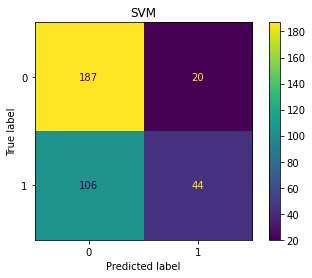

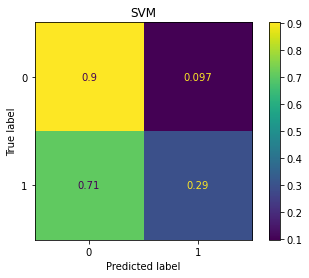

For model SVM: 

For class 0: 
 TPR is 0.9033816425120773; 
 FPR is 0.7066666666666667; 
 ACC is 0.6470588235294118. 

For class 1: 
 TPR is 0.29333333333333333; 
 FPR is 0.0966183574879227; 
 ACC is 0.6470588235294118. 

Overall Accuracy: 0.6470588235294118


c:\Users\86138\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


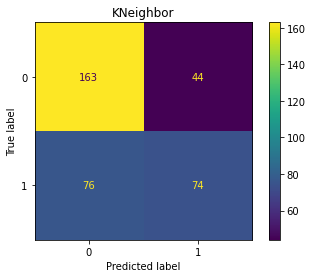

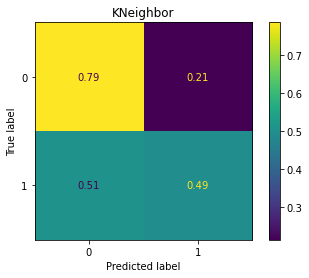

For model KNeighbor: 

For class 0: 
 TPR is 0.7874396135265701; 
 FPR is 0.5066666666666667; 
 ACC is 0.6638655462184874. 

For class 1: 
 TPR is 0.49333333333333335; 
 FPR is 0.21256038647342995; 
 ACC is 0.6638655462184874. 

Overall Accuracy: 0.6638655462184874


C:\Users\86138\AppData\Local\Temp/ipykernel_7120/2810416827.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


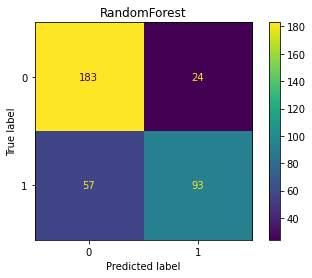

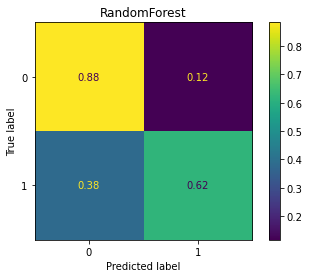

For model RandomForest: 

For class 0: 
 TPR is 0.8840579710144928; 
 FPR is 0.38; 
 ACC is 0.773109243697479. 

For class 1: 
 TPR is 0.62; 
 FPR is 0.11594202898550725; 
 ACC is 0.773109243697479. 

Overall Accuracy: 0.773109243697479


In [191]:
# 评估各模型性能
for name, model in models.items():
    ovo_eval(model, name)